In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# EDA:

In [2]:
data=pd.read_excel(r"C:\Users\disha\Downloads\Random Forest\Random Forest\glass.xlsx")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# checking for missing values

In [6]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no missing values in the dataset

# Check for outliers using box plots

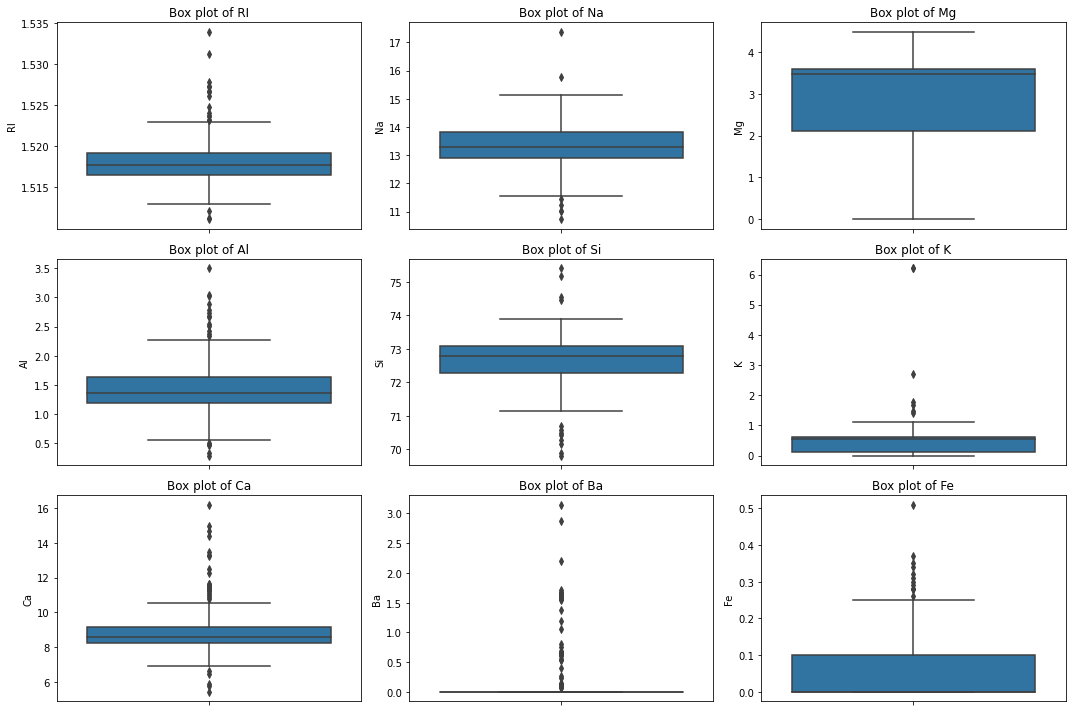

In [10]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):  # Exclude the 'Type' column
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

The box plots reveal the following potential outliers:

Na, Mg, Al, Si, K, Ca, Ba, Fe: Several points outside the whiskers suggest potential outliers, particularly for Mg, K, and Ba.

# Check for duplicated rows

In [14]:
data.duplicated().sum()

1

In [24]:
df=data.drop_duplicates()
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Correlation analysis

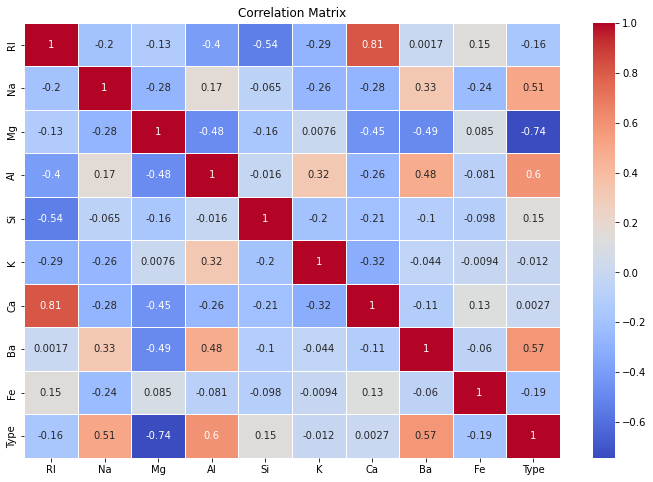

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Moderate positive correlation between Al and Ba indicates that higher Aluminum content is associated with higher Barium content.

Moderate negative correlation between Mg and Ba suggests that as Magnesium content increases, Barium content tends to decrease.

Si and Al has very weak negative correlation which indicates almost no linear relationship between Silicon and Aluminum.

# Visualize data distributions using histograms

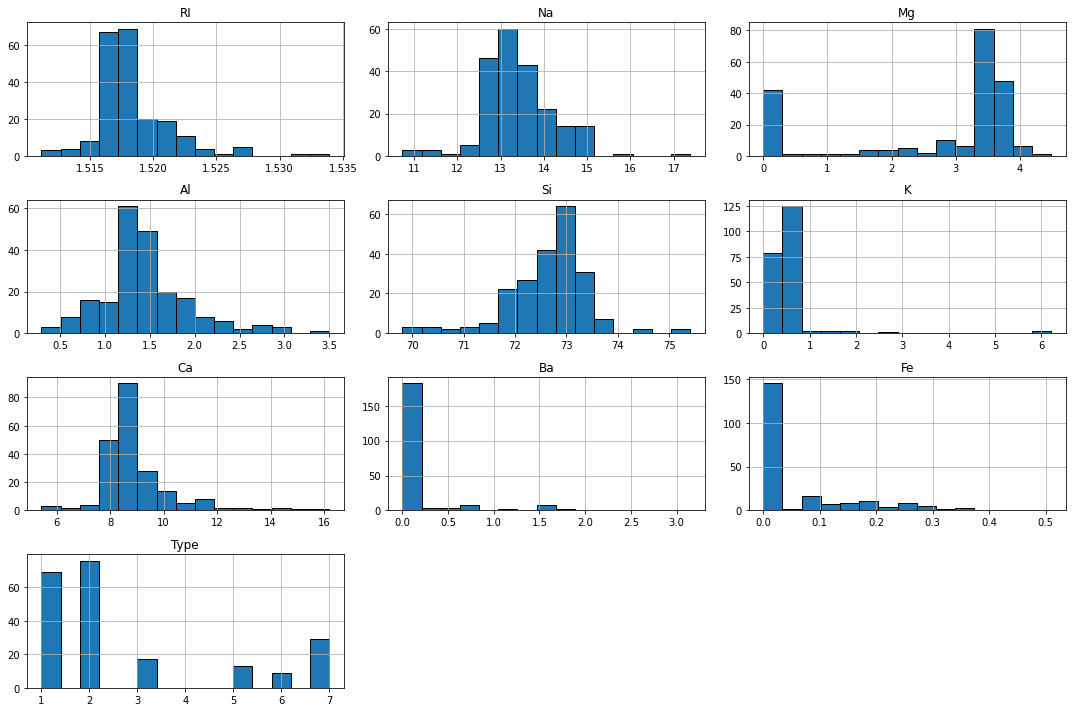

In [27]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 3), edgecolor='black')
plt.tight_layout()
plt.show()

# Visualize pairwise relationships using pair plots

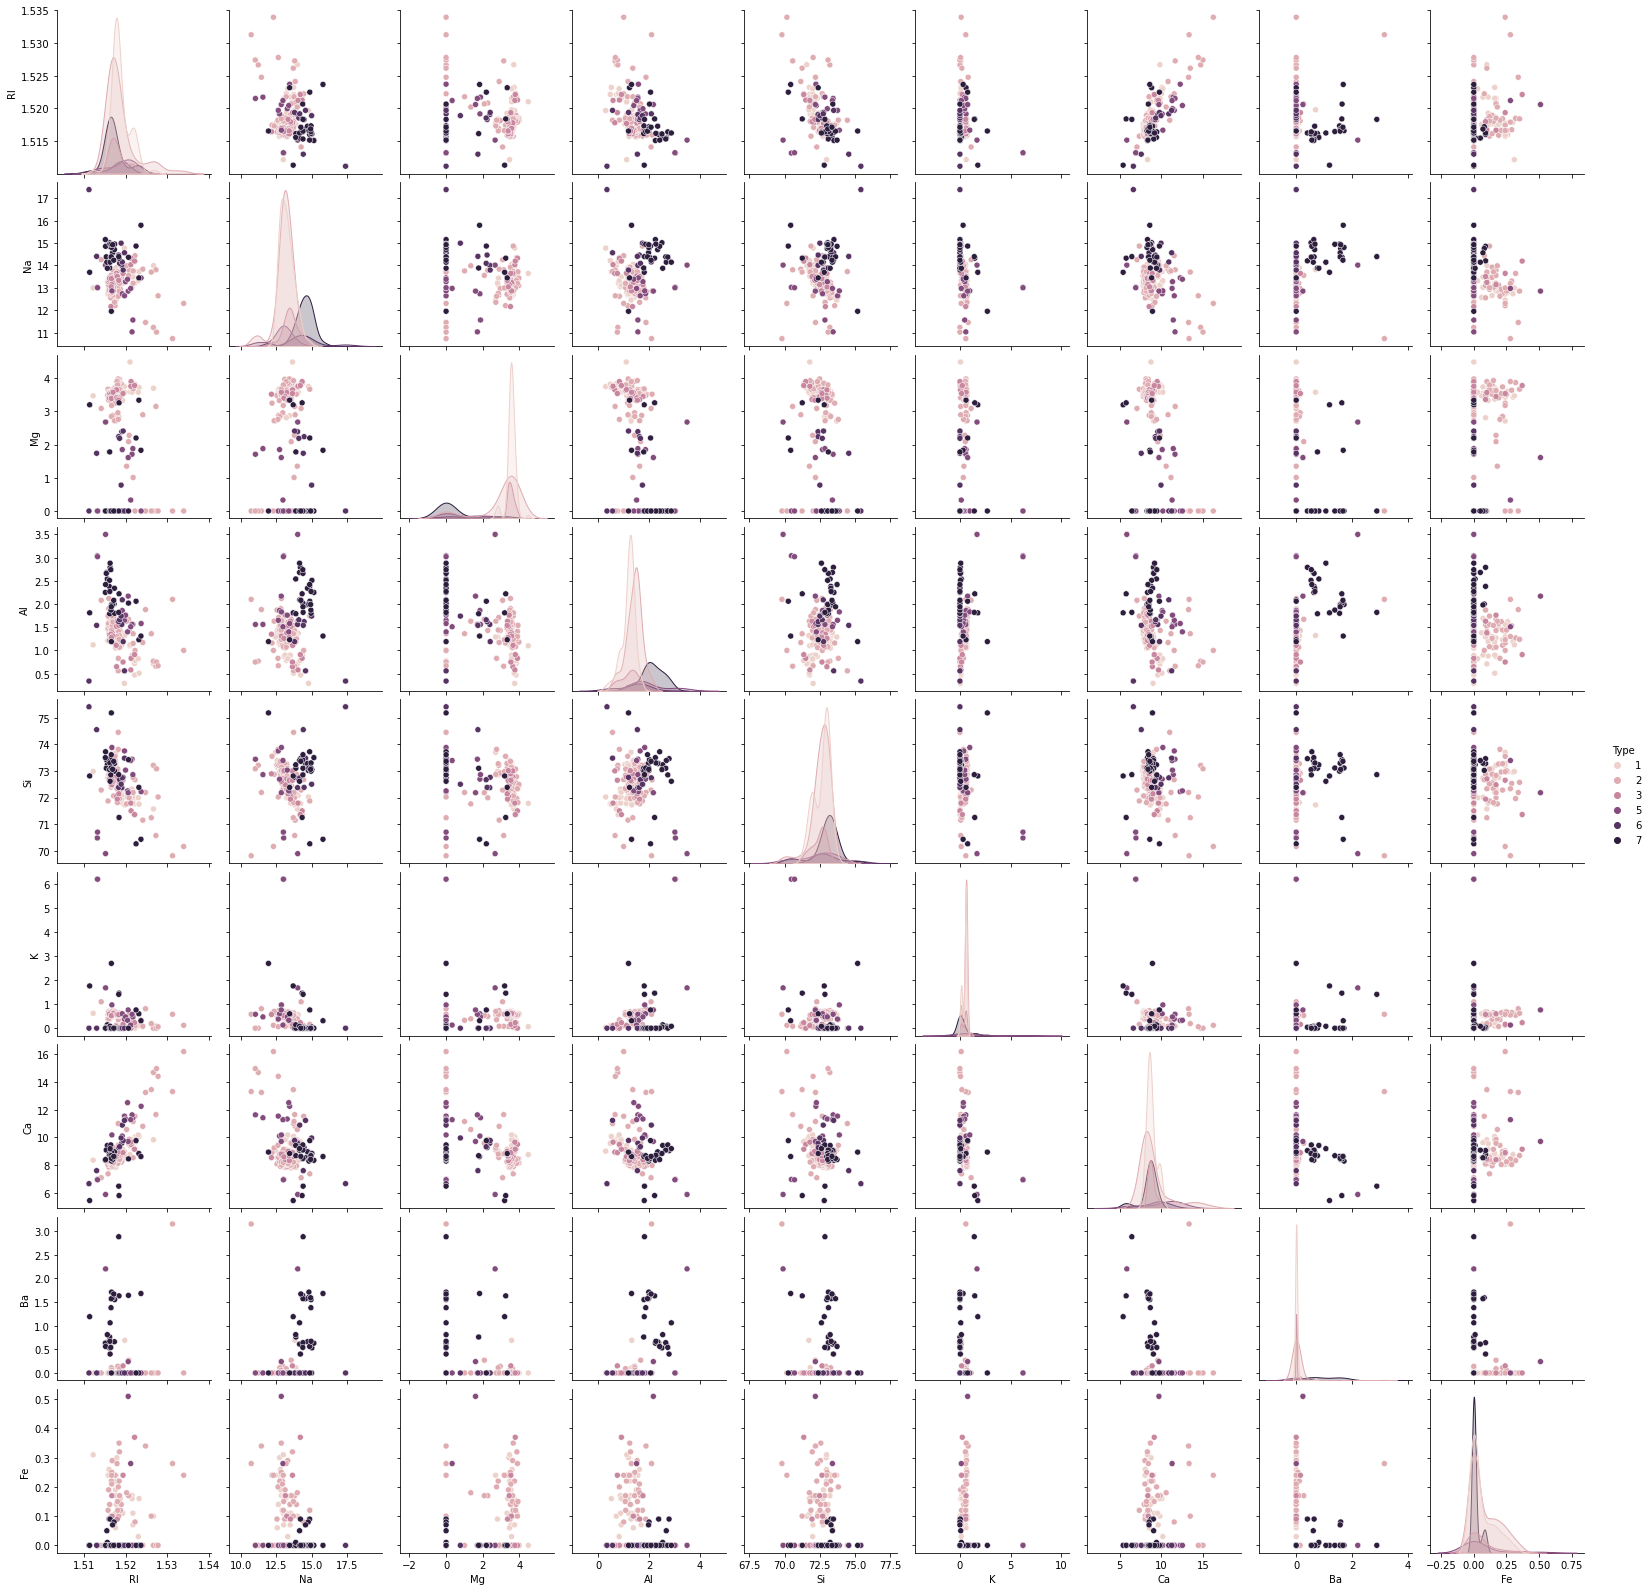

In [28]:
sns.pairplot(df, hue='Type')
plt.show()

# Feature Scaling:

In [31]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Type'])) 
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1]) 

In [32]:
df['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# Handling Imbalanced Data:

In [35]:
from imblearn.over_sampling import SMOTE

X = df_scaled
y = df['Type']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a RandomForestClassifier

In [40]:
rf_classifier = RandomForestClassifier(random_state=42)

In [41]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [46]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9347826086956522
Precision: 0.9370282104936836
Recall: 0.9347826086956522
F1-score: 0.9346422027081698


# Bagging (Random Forest)

In [50]:
bagging_classifier = RandomForestClassifier(random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)

In [51]:
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging (Random Forest) Accuracy:", accuracy_bagging)

Bagging (Random Forest) Accuracy: 0.9347826086956522


# Boosting (AdaBoost)

In [52]:
boosting_classifier = AdaBoostClassifier(random_state=42)
boosting_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_boosting = boosting_classifier.predict(X_test)

# Calculate accuracy
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Boosting (AdaBoost) Accuracy:", accuracy_boosting)

Boosting (AdaBoost) Accuracy: 0.3695652173913043


Bagging (Random Forest) achieved an accuracy of approximately 93.48%.
Boosting (AdaBoost) achieved a significantly lower accuracy of approximately 36.96%.
It's evident that Bagging (Random Forest) performed significantly better in terms of accuracy compared to Boosting (AdaBoost) on this dataset